In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def CSPSA(psi_est, nu_ite, fun_teor, fun,
          s=1, t=1/6, a=3, A=1, b = 0.1 ):
    """
    CSPSA
    IN
        psi_est: dim x n_par matrix. dim is de dimension of each vector, and n_par
                the number of guesses in parallel.
        nu_ite: int. Number of iterations of CSPSA.
        fun_teor: function. It is the known function, for example, the theoretical
                 fidelity between the unknown state of the system and the guess.
        fun: function. CSPSA uses this function for the optimization.
        s, t, a, A, b: parametros CSPSA
    OUT
        valor_optimo: real. Optimal value of fun finded by CSPSA.
    """

    n_par = int(psi_est.size/psi_est.shape[0])
    valor_optimo = np.zeros((n_par, nu_ite))
    valor_optimo[:,0] = fun_teor(psi_est)

    for k in range(0,nu_ite-1):
        valor_optimo[:,k+1], psi_est = (itCSPSA(psi_est/np.linalg.norm(psi_est, axis = 0),
                                       k, s, t, a, A, b, fun, fun_teor ))


    return valor_optimo

In [3]:
def itCSPSA(z_k,  k, s, t, a, A, b, fun, fun_teor):
    """iteracion de CSPSA
    IN
        z_k: dim x n_rep. Cada columna es un estimador de dimension dim.
        k: iteracion
        s, t, a, A, b: parametros CSPSA
        fun: funcion a optimizar
    OUT
        z_k: dim x n_rep. Estimador actualizado
        z_value: real. valor de fun en el estimador z_k
    """
    dim = z_k.shape[0]
    rep = int(z_k.size/z_k.shape[0])
    alpha = a/(k+1+A)**s
    beta = b/(k+1)**t
    delta = (1j)**(np.random.randint(1,5,(dim, rep))).reshape(2,rep)
    z_k_mas = z_k + beta*delta
    z_k_menos = z_k - beta*delta
    fun_k_mas = fun(z_k_mas)
    fun_k_menos = fun(z_k_menos)
    grad = np.divide(fun_k_mas - fun_k_menos, 2*beta*delta.conj())
    z_k = z_k - alpha*grad
    z_value = fun_teor(z_k)
    return z_value, z_k

In [4]:
def SPSA(psi_est, nu_ite, fun_teor, fun,
          s=1, t=1/6, a=3, A=1, b = 0.1 ):
    """
    SPSA
    IN
        psi_est: dim x n_par matrix. dim is de dimension of each vector, and n_par
                the number of guesses in parallel.
        nu_ite: int. Number of iterations of SPSA.
        fun_teor: function. It is the known function, for example, the theoretical
                 fidelity between the unknown state of the system and the guess.
        fun: function. SPSA uses this function for the optimization.
        s, t, a, A, b: parametros SPSA
    OUT
        valor_optimo: real. Optimal value of fun finded by SPSA.
    """

    n_par = int(psi_est.size/psi_est.shape[0])
    valor_optimo = np.zeros((n_par, nu_ite))
    valor_optimo[:,0] = fun_teor(psi_est)

    for k in range(0,nu_ite-1):
        valor_optimo[:,k+1], psi_est = (itSPSA(psi_est/np.linalg.norm(psi_est, axis = 0),
                                       k, s, t, a, A, b, fun, fun_teor ))


    return valor_optimo

In [5]:
def itSPSA(z_k,  k, s, t, a, A, b, fun, fun_teor):
    """iteracion de SPSA
    IN
        z_k: dim x n_rep. Cada columna es un estimador de dimension dim.
        k: iteracion
        s, t, a, A, b: parametros SPSA
        fun: funcion a optimizar
    OUT
        z_k: dim x n_rep. Estimador actualizado
        z_value: real. valor de fun en el estimador z_k
    """
    dim = z_k.shape[0]
    rep = int(z_k.size/z_k.shape[0])
    alpha = a/(k+1+A)**s
    beta = b/(k+1)**t
    
    #Cambiamos un delta complejo por uno real (+1,-1)
    
    delta = (-1)**(np.random.randint(1,5,(dim, rep))).reshape(2,rep)
    delta_i = (-1)**(np.random.randint(1,5,(dim, rep))).reshape(2,rep)
    
    #Definimos parte real e imaginaria
    
    z_k_mas_r = np.real(z_k) + beta*delta
    z_k_menos_r = np.real(z_k) - beta*delta
    
    z_k_mas_i = np.imag(z_k) + beta*delta_i
    z_k_menos_i = np.imag(z_k) - beta*delta_i
    

    #Nuevo estado, normalizado
    
    z_k_mas = z_k_mas_r +1j*z_k_mas_i
    z_k_menos = z_k_menos_r+1j*z_k_menos_i
    
    z_k_mas = z_k_mas/np.linalg.norm(z_k_mas, axis=0)
    z_k_menos = z_k_menos/np.linalg.norm(z_k_menos, axis=0)
    
    fun_k_mas = fun(z_k_mas)
    fun_k_menos = fun(z_k_menos)
    
    #Gradiente real e imaginaria
    
    grad = np.divide(fun_k_mas - fun_k_menos, 2*beta*delta)
    grad_i = np.divide(fun_k_mas - fun_k_menos, 2*beta*delta_i)
    
    z_k = z_k - alpha*grad - 1j*alpha*grad_i
    z_k = z_k/np.linalg.norm(z_k, axis=0)
    
    z_value = fun_teor(z_k)
    return z_value, z_k

In [6]:

def SPSA2(psi_est, nu_ite, fun_teor, fun,
          s=1, t=1/6, a=3, A=1, b = 0.1 ):
    """
    SPSA
    IN
        psi_est: dim x n_par matrix. dim is de dimension of each vector, and n_par
                the number of guesses in parallel.
        nu_ite: int. Number of iterations of CSPSA.
        fun_teor: function. It is the known function, for example, the theoretical
                 fidelity between the unknown state of the system and the guess.
        fun: function. CSPSA uses this function for the optimization.
        s, t, a, A, b: parametros CSPSA
    OUT
        valor_optimo: real. Optimal value of fun finded by CSPSA.
    """

    n_par = int(psi_est.size/psi_est.shape[0])
    valor_optimo = np.zeros((n_par, nu_ite))
    valor_optimo[:,0] = fun_teor(psi_est)

    for k in range(0,nu_ite-1):
        valor_optimo[:,k+1], psi_est = (itSPSA2(psi_est/np.linalg.norm(psi_est, axis = 0),
                                       k, s, t, a, A, b, fun, fun_teor ))


    return valor_optimo

In [7]:
def itSPSA2(z_k,  k, s, t, a, A, b, fun, fun_teor):
    """iteracion de CSPSA
    IN
        z_k: dim x n_rep. Cada columna es un estimador de dimension dim.
        k: iteracion
        s, t, a, A, b: parametros CSPSA
        fun: funcion a optimizar
    OUT
        z_k: dim x n_rep. Estimador actualizado
        z_value: real. valor de fun en el estimador z_k
    """
    # convertimos el estado complejo en un vector real
    z_k = estado2vec(z_k)
    #
    dim = z_k.shape[0]
    rep = int(z_k.size/z_k.shape[0])
    alpha = a/(k+1+A)**s
    beta = b/(k+1)**t
    delta = (-1)**(np.random.randint(1,5,(dim, rep)))
    z_k_mas = z_k + beta*delta
    z_k_menos = z_k - beta*delta
    # volvemos al estado complejo al evaluar la funcion
    fun_k_mas = fun(vec2estado(z_k_mas))
    fun_k_menos = fun(vec2estado(z_k_menos))
    grad = np.divide(fun_k_mas - fun_k_menos, 2*beta*delta.conj())
    z_k = z_k - alpha*grad
    z_value = fun_teor(vec2estado(z_k))
    z_k = vec2estado(z_k)
    return z_value, z_k

In [8]:
def estado2vec(z_k):
    """iteracion de SPSA
    IN
        z_k: dim x n_rep. Cada columna es un estimador de dimension dim.
    OUT
        z_k_vec: 2 dim x n_rep. Estimador actualizado
    """
    dim = z_k.shape[0]
    n_rep = z_k.shape[1]
    z_k_vec = np.zeros((2*dim, n_rep))
    z_k_vec[:dim, :] = np.real(z_k)
    z_k_vec[dim:, :] = np.imag(z_k)
    return z_k_vec

def vec2estado(z_k_vec):
    """iteracion de SPSA
    IN
        z_k_vec: 2 dim x n_rep. Estimador actualizado
    OUT
        z_k: dim x n_rep. Cada columna es un estimador de dimension dim.
    """
    dim2 = z_k_vec.shape[0]
    n_rep = z_k_vec.shape[1]
    z_k = z_k_vec[:int(dim2/2), :] + z_k_vec[int(dim2/2):, :]*1j 
    return z_k/np.linalg.norm(z_k, axis=0)

In [9]:
# Definir Estado

def estado(dim, n_par):
    psi = (np.random.normal(loc=0.0, scale=1.0,
           size=(dim, n_par))
           + np.random.normal(loc=0.0, scale=1.0,
           size=(dim, n_par))*1j)
    psi = psi/np.linalg.norm(psi, axis=0)
    return psi

In [10]:
# Definir Hamiltoniano

def H_paul (A,B,C):
    pauli_x = np.array((((0, 1), (1, 0))))
    pauli_y = np.array((((0, -1j), (1j, 0))))
    pauli_z = np.array((((1, 0), (0, -1))))
    H_paul = A*pauli_x + B*pauli_y + C*pauli_z
    return H_paul

In [11]:
# Definir Valor de expectacion

def exp_H (psi_est, H):
    psi = np.matrix(psi_est)
    psi = psi/np.linalg.norm(psi, axis=0)
    psi_dagger = psi.getH()
    H = np.matrix(H)
    exp_H = psi_dagger*H*psi
    return exp_H

In [12]:
d = 2
nu_par = 1
NU_ITERACIONES = 300

#A = np.sqrt(0.3)
#B = np.sqrt(0.2)
#C = np.sqrt(0.5)
A = 1
B = 3
C = 5

In [13]:
psi_est = estado(d,nu_par)


In [14]:
H = H_paul(A,B,C)


In [15]:
fun = lambda x : exp_H(x, H)


In [16]:
# Ground-state Teórico

E = A**2 + B**2 + C**2

const1 = np.sqrt(1/2) * np.sqrt((A**2+B**2)/(E-C*(np.sqrt(E))))
const2 = (C-np.sqrt(E))/(A+1j*B)

#psi_teo = const1*np.matrix([[const2], [1]])
#fun(psi_teo)

Ground_teo = -(np.sqrt(A**2 + B**2 + C**2))
print(Ground_teo)

-5.916079783099616


In [17]:
Result_CSPSA = CSPSA(psi_est, NU_ITERACIONES, fun, fun)

/home/dmunoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
/home/dmunoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


In [18]:
Result_SPSA = SPSA(psi_est, NU_ITERACIONES, fun, fun)

/home/dmunoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
/home/dmunoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


In [19]:
Result_SPSA2 = SPSA2(psi_est, NU_ITERACIONES, fun, fun)

/home/dmunoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
/home/dmunoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


In [20]:
error_CSPSA = abs(Result_CSPSA - Ground_teo)
error_SPSA = abs(Result_SPSA - Ground_teo)
error_SPSA2 = abs(Result_SPSA2 - Ground_teo)

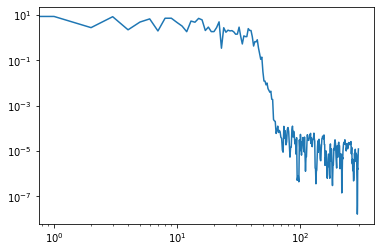

In [21]:
#plt.plot(np.array(error_CSPSA[:]).T)
plt.loglog(np.array(error_CSPSA[:]).T)

#plt.plot(np.array(Result_CSPSA[:]).T)
#plt.loglog(np.array(Result_CSPSA[:]).T)

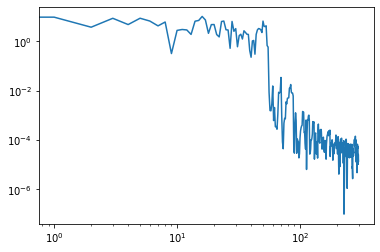

In [22]:
#plt.plot(np.array(error_SPSA[:]).T)
plt.loglog(np.array(error_SPSA[:]).T)

#plt.plot(np.array(Result_SPSA[:]).T)
#plt.loglog(np.array(Result_SPSA[:]).T)

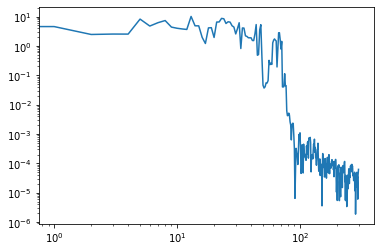

In [23]:
#plt.plot(np.array(error_SPSA2[:]).T)
plt.loglog(np.array(error_SPSA2[:]).T)

#plt.plot(np.array(Result_SPSA2[:]).T)
#plt.loglog(np.array(Result_SPSA2[:]).T)

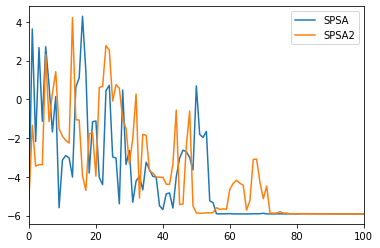

In [28]:
plt.plot(np.array(Result_SPSA[:]).T, label='SPSA')
plt.plot(np.array(Result_CSPSA[:]).T,label='CSPSA')
plt.plot(np.array(Result_SPSA2[:]).T,label='SPSA2')
plt.xlim(0,100)
plt.legend()

In [25]:
np.savetxt('prueba.txt', Result_SPSA, delimiter=',')
print(Result_SPSA)

[[-5.13665744  3.63569364 -2.1780195   2.67292112 -1.13047282  2.71688027
   0.73217499 -1.68244863  0.14796194 -5.59682871 -3.14141526 -2.90028355
  -3.02380889 -4.01308354  0.62913344  1.10981598  4.29196442  1.42215889
  -3.80432777 -1.15835013 -1.11707198 -4.03651042 -4.40380386  0.4439807
   0.72354329 -2.96871507 -3.03535517 -5.39544511  0.48246201 -3.36544662
  -2.63759777 -5.31319429 -4.2208901  -3.97529379 -4.67523618 -3.2454035
  -3.62390553 -3.97613402 -4.01441696 -5.49424532 -5.69000925 -4.88134519
  -4.8332776  -5.61523738 -4.00593027 -3.03380098 -2.62124129 -2.70564256
  -3.00115291 -3.64382615  0.69590881 -1.80971607 -1.96729971 -1.65448179
  -5.24005393 -5.33425737 -5.90737009 -5.91452047 -5.91455482 -5.91317938
  -5.90063189 -5.91546859 -5.91400879 -5.91573366 -5.91572783 -5.9158074
  -5.91498814 -5.90751392 -5.90803375 -5.90731855 -5.88180874 -5.91513632
  -5.91599685 -5.91603586 -5.91560019 -5.91532464 -5.91535742 -5.91256293
  -5.9131707  -5.91117073 -5.91103916 -5.

In [26]:
np.savetxt('prueba.txt', Result_CSPSA, delimiter=',')
print(Result_CSPSA)

[[-5.13665744  2.51662283 -3.20608867  2.29506401 -3.74239607 -1.14478879
   0.6596274  -3.98354071  1.11599154  1.12633307 -1.33071997 -2.73440822
  -4.12202466 -0.64298247 -1.22301881  1.01351291  0.049638   -3.89510676
  -3.05468813 -4.10959642 -4.1057269  -3.18875692 -1.0429864  -5.58051241
  -3.23214404 -4.21695176 -3.82420707 -3.97185928 -3.9145895  -4.15878153
  -4.52943666 -4.50880216 -3.07031292 -4.81522313 -5.39951397 -4.74132105
  -4.82465629 -4.83018981 -3.46692229 -3.87644911 -3.89118057 -4.84465462
  -5.49750791 -5.25971228 -5.27640319 -5.12403152 -5.56711175 -5.7170996
  -5.80726084 -5.78049435 -5.88522983 -5.90407899 -5.90413612 -5.90792565
  -5.90628049 -5.91051626 -5.91145045 -5.91224751 -5.91180805 -5.91418091
  -5.91423274 -5.91583987 -5.91586821 -5.91588065 -5.91602106 -5.91600211
  -5.91595643 -5.916015   -5.91600001 -5.91601026 -5.91603989 -5.91604395
  -5.91606901 -5.91607101 -5.91595918 -5.91604277 -5.9160029  -5.91606127
  -5.91605464 -5.91598883 -5.91597277 -

In [27]:
print(psi_est)
fun(psi_est)

[[ 0.28742022-0.33797781j]
 [-0.51264359-0.7350899j ]]


matrix([[-5.13665744+8.8817842e-16j]])